In [1]:
from keras.preprocessing.image import ImageDataGenerator
import pickle
TrainingImagePath='Face Images/Final Training Images'
TestImagePath='Face Images/Final Validating Images'
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
 

test_datagen = ImageDataGenerator()
 
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=40,
        class_mode='categorical')
 
 
test_set = test_datagen.flow_from_directory(
        TestImagePath,
        target_size=(64, 64),
        batch_size=40,
        class_mode='categorical')
 

test_set.class_indices
TrainClasses=training_set.class_indices
 
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
 
print("Mapping of Face and its ID",ResultMap)
 
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Mapping of Face and its ID {0: 'andy', 1: 'daffa', 2: 'denis', 3: 'haris', 4: 'henry'}

 The Number of output neurons:  5


Epoch 1/30
18/18 [==============================] - 4s 222ms/step - loss: 55.3767 - accuracy: 0.3139 - val_loss: 0.9233 - val_accuracy: 0.6400
Epoch 2/30
18/18 [==============================] - 4s 219ms/step - loss: 0.5095 - accuracy: 0.8347 - val_loss: 0.3852 - val_accuracy: 0.8300
Epoch 3/30
18/18 [==============================] - 5s 262ms/step - loss: 0.0619 - accuracy: 0.9806 - val_loss: 0.1363 - val_accuracy: 0.9250
Epoch 4/30
18/18 [==============================] - 4s 233ms/step - loss: 0.0298 - accuracy: 0.9861 - val_loss: 0.5405 - val_accuracy: 0.9250
Epoch 5/30
18/18 [==============================] - 4s 235ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.2212 - val_accuracy: 0.9300
Epoch 6/30
18/18 [==============================] - 4s 214ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.4221 - val_accuracy: 0.9000
Epoch 7/30
18/18 [==============================] - 4s 210ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9600
Epoch

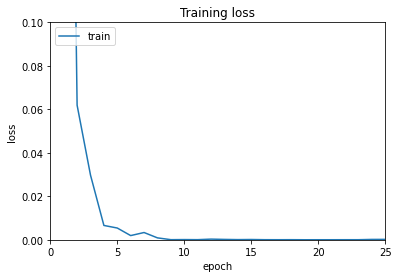

In [23]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import time
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

classifier= Sequential()
 
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
 

classifier.add(MaxPool2D(pool_size=(2,2)))
 

classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))
 

classifier.add(Flatten())
 

classifier.add(Dense(64, activation='relu'))
 
classifier.add(Dense(OutputNeurons, activation='softmax'))
 

classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
 

StartTime=time.time()
 
history = classifier.fit(
                    training_set,
                    steps_per_epoch=18,
                    epochs=30,
                    validation_data=test_set,
                    validation_steps=5)
 
EndTime=time.time()
print("###### Total Time Taken: ", round(EndTime-StartTime), 'Second ######')
classifier.save("model2.h5")

plt.plot(history.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.axis([0, 25, 0, 0.1])
plt.show()

In [2]:
import numpy as np
import cv2
import face_recognition as fr
from keras.preprocessing import image
from keras.models import load_model
import os

classifier = load_model('model2.h5')
def presensi(name):
    with open('absensi.csv', 'r+') as f:
        listdata = f.readlines()
        listnama = []
        for line in listdata :
            entry = line.split(', ')
            listnama.append(entry[0])

        if name not in listnama :
            f.writelines(f'\n{name}, Hadir')

ImagePath='Face Images/Final Testing Images/henrydenis.png'
img = cv2.imread(ImagePath)
face_locations = fr.face_locations(img)
count = 1

for face_location in face_locations:
    top, right, bottom, left = face_location
    crop_img = img[top-100:bottom+20, left:right+30]
    cv2.imwrite("data/image_%d.jpg" % count, crop_img) 
    newImagePath = ('data/image_%d.jpg' % count)
    test_image=image.load_img(newImagePath,target_size=(64, 64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=classifier.predict(test_image,verbose=0)
    nama = ResultMap[np.argmax(result)]
    print('####'*10)
    print('Prediction is: ', nama)
    presensi(nama)
    count += 1


# for i in range(1, count):
#     if os.path.exists("data/image_%d.jpg" % i):
#         os.remove("data/image_%d.jpg" % i)
#     else:
#         print("The file does not exist")

########################################
Prediction is:  andy
########################################
Prediction is:  denis
